**Certain Factor (CF)**

In [23]:
gejala_user = {
    "demam": 0.2,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6,
    "pilek": 0.7,
    "rasa_tidak_enak_badan": 0.8,
    "batuk_kering": 0.5,
    "nyeri_otot": 0.5,
    "nyeri_sendi": 0.5
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.7,
        "rasa_tidak_enak_badan": 0.8,
        "batuk_kering": 0.5,
        "nyeri_otot": 0.5,
        "nyeri_sendi": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis flu: {cf_flu:.2f}")

CF diagnosis flu: 0.97


Diagnosis Multiple Penyakit

In [11]:
gejala_user = {
    "nyeri_sendi": 0.8,
    "bengakak_sendi": 0.7,
    "kaku_sendi_pagi": 0.9,
    "demam_ringan": 0.3
}

pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri_sendi": 0.9,
        "bengakak_sendi": 0.8,
        "kaku_sendi_pagi": 0.9,
        "demam_ringan": 0.4
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengakak_sendi": 0.6,
        "kaku_sendi_pagi": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Mendiagnosis 2 Penyakit Berdasarkan Gejala yang Sama
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan[penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis rheumatoid_arthritis: 0.98
CF diagnosis osteoarthritis: 0.89


Diagnosis Multiple Penyakit dengan Bobot Gejala

In [12]:
# Example 4 Diabetes Diagnosis with Weighted Symptoms
gejala_user = {
    "sering_haus": 0.8,
    "sering_buang_air_kecil": 0.9,
    "penurunan_berat_badan": 0.6,
    "luka_lambat_sembuh": 0.7,
    "penglihatan_kabur": 0.5
}

# Pengetahuan Pakar dengan Bobot Gejala
pengetahuan = {
    "diabetes_tipe1": {
        "sering_haus": 0.9,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.8,
        "luka_lambat_sembuh": 0.5
    },
    "diabetes_tipe2": {
        "sering_haus": 0.7,
        "sering_buang_air_kecil": 0.7,
        "penurunan_berat_badan": 0.5,
        "luka_lambat_sembuh": 0.8,
        "penglihatan_kabur": 0.6
    }
}

# Bobot kepentingan gejala (1-5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}

def hitung_cf_weighted(gejala_user, pengetahuan_pakar, bobot):
    cf_total = 0
    first = True
    total_bobot = 0

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar and gejala in bobot:
            cf_pakar = pengetahuan_pakar[gejala]
            gejala_weight = bobot[gejala] / 5
            cf = cf_user * cf_pakar * gejala_weight

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

            total_bobot += gejala_weight

    # Normalisasi hasil berdasarkan total bobot
    if total_bobot > 0:
        cf_total = cf_total / total_bobot * len([g for g in gejala_user if g in pengetahuan_pakar])

    return cf_total

for penyakit in pengetahuan:
    cf_result = hitung_cf_weighted(gejala_user, pengetahuan[penyakit], bobot_gejala)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis diabetes_tipe1: 1.16
CF diagnosis diabetes_tipe2: 1.27


**Fuzzy Logic**

In [13]:
!pip install scikit-fuzzy

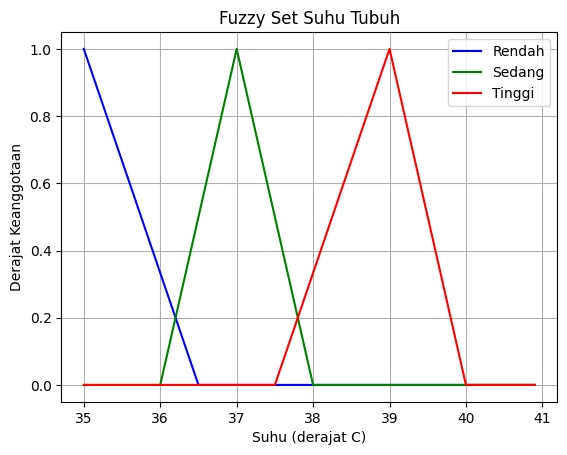

Derajat keanggotaan suhu 35.2 derajat C:
- Rendah: 0.87
- Sedang: 0.00
- Tinggi: 0.00


In [14]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

suhu = np.arange(35, 41, 0.1)

rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_suhu = 35.2
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

Klasifikasi Tingkat Air Dalam Tangki

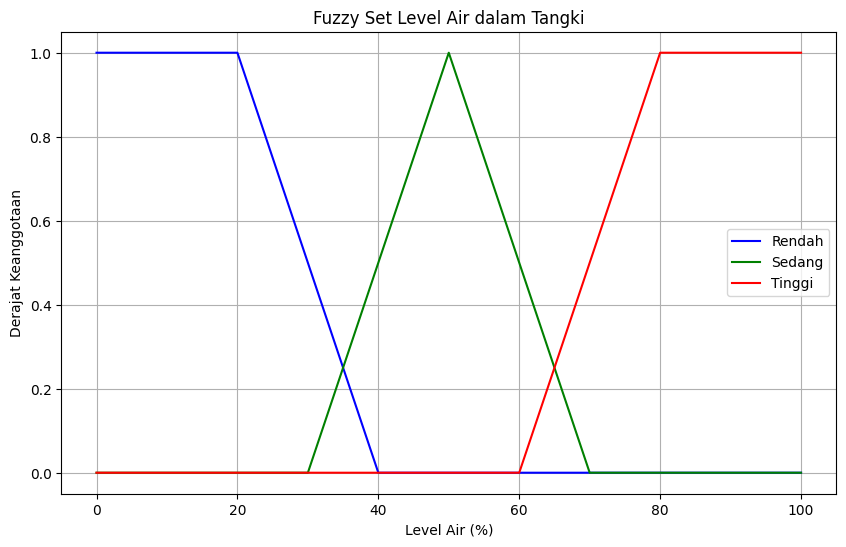

Derajat keanggotaan level air 25%:
- Rendah: 0.75
- Sedang: 0.00
- Tinggi: 0.00


In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of Discourse
level = np.arange(0, 101, 1)

# Fuzzy Sets
rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

# Visualize Fuzzy Sets
plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Membership for a Specific Input
input_level = 25
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah: {level_rendah:.2f}")
print(f"- Sedang: {level_sedang:.2f}")
print(f"- Tinggi: {level_tinggi:.2f}")

Index Kualitas Udara

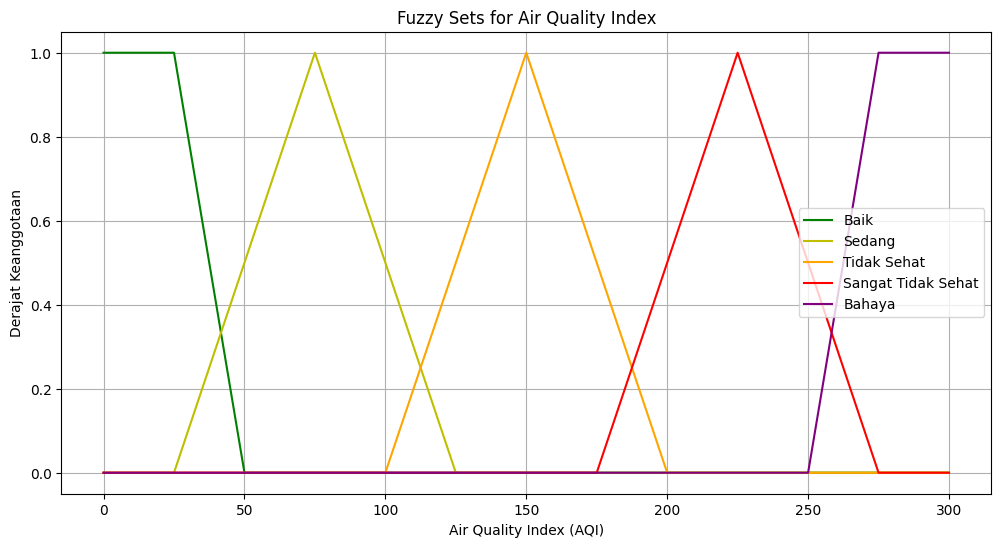

Derajat Keanggotaan AQI 120:
- Baik: 0.00
- Sedang: 0.10
- Tidak Sehat: 0.40
- Sangat Tidak Sehat: 0.00
- Bahaya: 0.00


In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of Discourse
aqi = np.arange(0, 301, 1)

# Fuzzy Sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 200])
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize Fuzzy Sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'g', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Bahaya')
plt.title('Fuzzy Sets for Air Quality Index')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

print(f"Derajat Keanggotaan AQI {input_aqi}:")
print(f"- Baik: {aqi_baik:.2f}")
print(f"- Sedang: {aqi_sedang:.2f}")
print(f"- Tidak Sehat: {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat: {aqi_sangat_tidak_sehat:.2f}")
print(f"- Bahaya: {aqi_berbahaya:.2f}")

Kontrol Air Conditioner

Untuk suhu 30 Derajat C dan Kelembaban 75%, Kecepatan Kipas AC: 55.64%


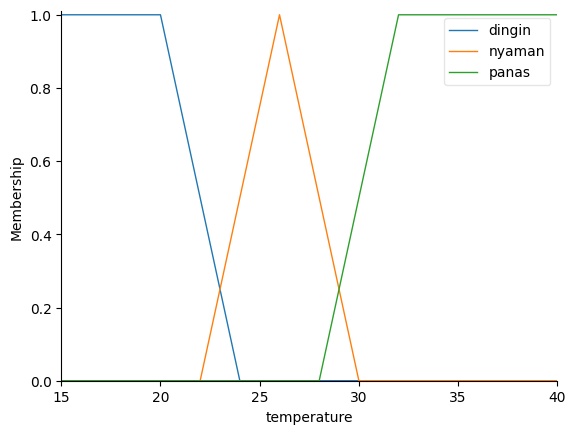

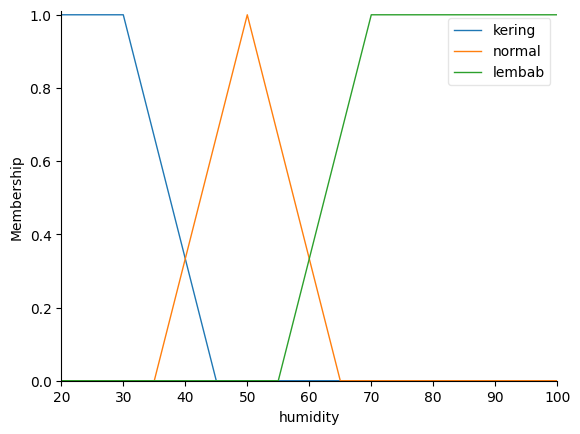

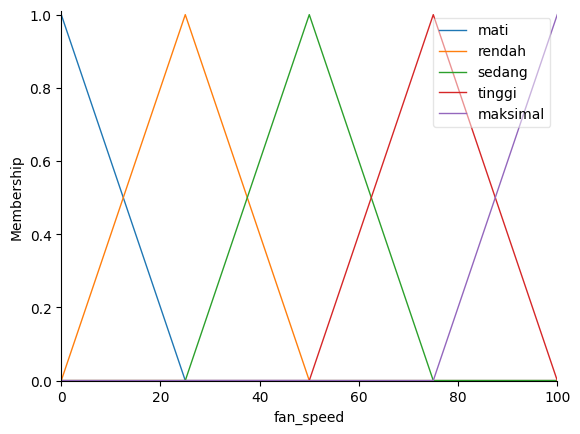

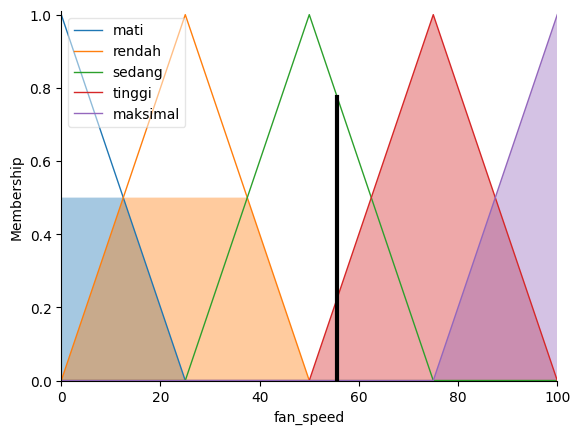

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input Variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output Variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] | humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] | humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] | humidity['lembab'], fan_speed['tinggi'])
rule4 = ctrl.Rule(temperature['nyaman'] | humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] | humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] | humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] | humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] | humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] | humidity['lembab'], fan_speed['maksimal'])
rule10 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])

# Create Control System
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input Values
ac.input['temperature'] = 22
ac.input['humidity'] = 75

# Compute Result
ac.compute()
print(f"Untuk suhu 30 Derajat C dan Kelembaban 75%, Kecepatan Kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize Result
fan_speed.view(sim=ac)
plt.show()
#